In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
gene_bed_df = pd.read_csv('../data/results/deseq/allacma_fusca.tsebra.augustus.genes.bed', 
                        sep = '\t', 
                        header = None,
                        names = ['chrom','start','end','Geneid'])
SBG_df = pd.read_csv('../data/results/deseq2/allacma_fusca/v_1/allacma_fusca.DEseq2_results_filtered.tsv', 
                        sep = '\t')
raw_df = pd.read_csv('../data/results/deseq2/allacma_fusca/v_1/allacma_fusca.DEseq2_results_raw.tsv', 
                        sep = '\t')

In [51]:
#how to import featurecounts data to look at dosage?

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,g_27516,201.994071,4.873614,1.997111,2.440333,0.014674,0.034694
1,g_89,0.000000,NaN,NaN,NaN,NaN,NaN
2,g_92,107.971550,3.828103,1.199300,3.191947,0.001413,0.004194
3,g_94,76.484759,0.740931,0.797213,0.929402,0.352681,0.482745
4,g_95,62.965088,0.821753,0.793751,1.035278,0.300539,0.428585
...,...,...,...,...,...,...,...
25938,g_4693,0.284396,1.551587,3.099186,0.500643,0.616622,NaN
25939,g_4695,0.131596,0.221832,3.107732,0.071381,0.943095,NaN
25940,g_4696,0.000000,NaN,NaN,NaN,NaN,NaN
25941,g_4706,0.043541,0.224751,3.109072,0.072289,0.942372,NaN


In [53]:
gene_bed_df = gene_bed_df.merge(SBG_df[['Geneid','log2FoldChange']], 
                                       how = 'outer',
                                       on = 'Geneid')

In [54]:
bias_conditions = [
    (gene_bed_df['log2FoldChange'] > 0),
    (gene_bed_df['log2FoldChange'] < 0)]
bias_outcomes = ['male_biased', 'female_biased']
gene_bed_df['bias'] = np.select(bias_conditions, bias_outcomes, default='unbiased')

In [55]:
chromosomes = ['OX359245.1',
 'OX359246.1',
 'OX359247.1',
 'OX359248.1',
 'OX359249.1',
 'OX359250.1']

chrom_df = gene_bed_df[gene_bed_df['chrom'].isin(chromosomes)]

In [56]:
chrom_df.groupby(['chrom'])['bias'].value_counts()

chrom       bias         
OX359245.1  unbiased         4572
            male_biased       953
            female_biased     425
OX359246.1  unbiased         4455
            male_biased       878
            female_biased     456
OX359247.1  unbiased         3370
            male_biased       901
            female_biased     381
OX359248.1  unbiased         2760
            male_biased       718
            female_biased     354
OX359249.1  unbiased         1793
            male_biased       735
            female_biased     231
OX359250.1  unbiased         1717
            male_biased       861
            female_biased     137
Name: count, dtype: int64

In [45]:
chrom_df.groupby(['chrom'])['bias'].value_counts(normalize='True')

chrom       bias         
OX359245.1  unbiased         0.768403
            male_biased      0.160168
            female_biased    0.071429
OX359246.1  unbiased         0.769563
            male_biased      0.151667
            female_biased    0.078770
OX359247.1  unbiased         0.724420
            male_biased      0.193680
            female_biased    0.081900
OX359248.1  unbiased         0.720251
            male_biased      0.187370
            female_biased    0.092380
OX359249.1  unbiased         0.649873
            male_biased      0.266401
            female_biased    0.083726
OX359250.1  unbiased         0.632413
            male_biased      0.317127
            female_biased    0.050460
Name: proportion, dtype: float64

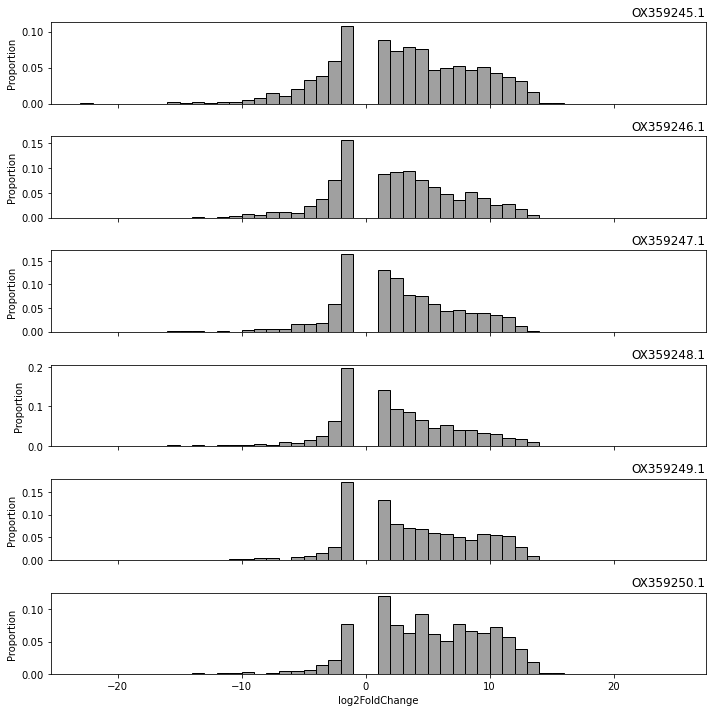

In [81]:
fig, axs = plt.subplots(nrows = 6, sharex=True, figsize = (10,10))

for i, chrom in enumerate(chromosomes):
    
    sns.histplot(chrom_df[chrom_df['chrom']==chrom]['log2FoldChange'],
                color = 'grey',
                stat = 'proportion',
                bins = np.arange(-23, 26, 1),
                ax = axs[i])
    axs[i].set_title(chrom, loc = 'right')
    

plt.tight_layout()

In [102]:
barplot_df_count = chrom_df.groupby(['chrom'])['bias'].value_counts().reset_index()
barplot_df_prop = chrom_df.groupby(['chrom'])['bias'].value_counts(normalize='True').reset_index()

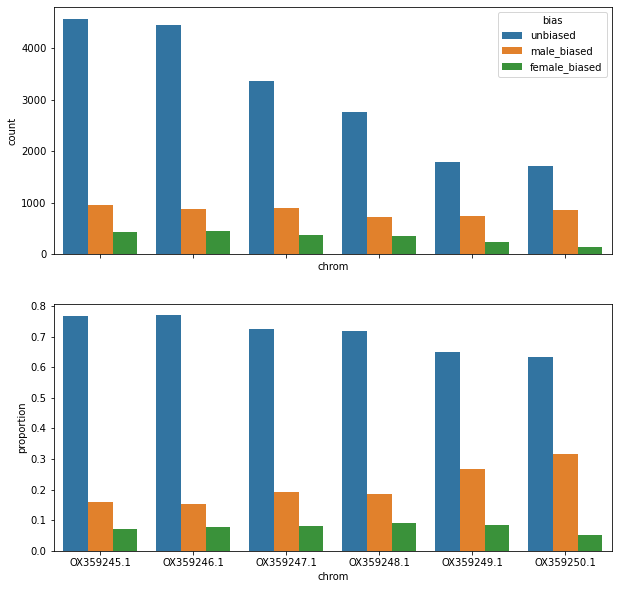

In [101]:
fig, axs = plt.subplots(nrows = 2, sharex=True, figsize = (10,10))

sns.barplot(data=barplot_df_count, 
            x="chrom", 
            y="count",
            hue="bias",
            ax = axs[0])

sns.barplot(data=barplot_df_prop, 
            x="chrom", 
            y="proportion",
            hue="bias",
            ax = axs[1])

axs[1].legend().set_visible(False)